<a href="https://colab.research.google.com/github/farghea/database_for_mechanical_mechanism/blob/main/4-%20plot_figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q datasets
!pip install -U -q PyDrive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.1

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_url = 'https://drive.google.com/file/d/1yC6nKih8HcAAoKCVM-Lo6bxGQ2O8T5-_/view?usp=sharing'
file_id = file_url.split('/')[5]

downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('combined_dataset.zip')

print('File downloaded successfully.')


File downloaded successfully.


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    if not os.path.exists(zip_path):
        print(f"The file {zip_path} does not exist.")
        return

    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted all files to {extract_to}")


unzip_file(
    zip_path='/content/combined_dataset.zip',
    extract_to='/content')


Extracted all files to /content


In [ ]:
import json

file_path = '/content/combined_dataset_256x/metadata.jsonl'

with open(file_path, 'r') as infile:
    lines = infile.readlines()


first_n_characters = 150
processed_lines = []
for line in lines:
    data = json.loads(line)

    if 'text' in data:
        data['text'] = data['text'].split('.')[1]
        if len(data['text']) > first_n_characters:
            data['text'] = data['text'][:first_n_characters] + " ..."
        else:
            data['text'] = data['text'][:first_n_characters]

    processed_lines.append(json.dumps(data) + '\n')

with open(file_path, 'w') as outfile:
    outfile.writelines(processed_lines)


In [ ]:
from datasets import load_dataset

dataset = load_dataset("/content/combined_dataset_256x", split="train")
dataset = dataset.shuffle(seed=42)

Resolving data files:   0%|          | 0/8994 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


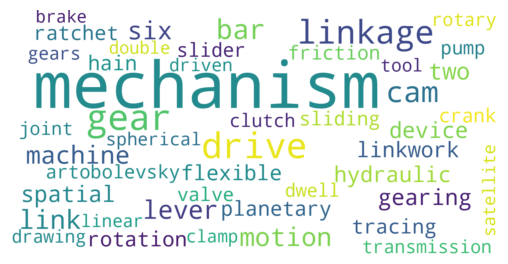

            Word Frequency                                           Synonyms
Index                                                                        
1      mechanism      4850           mechanism, chemical_mechanism, mechanics
2           gear       541  paraphernalia, gearing, gear_mechanism, appurt...
3          drive       533  motor, repulse, beat_back, parkway, driving, r...
4        linkage       451                              gene_linkage, linkage
5            cam       362                     Cam_River, cam, River_Cam, Cam
6            bar       318  saloon, streak, barricade, Browning_automatic_...
7           link       283  radio_link, contact, colligate, tie_in, tie, u...
8         motion       279  motion, apparent_motion, motility, gesture, ap...
9          lever       272     jimmy, prise, pry, prize, lever, lever_tumbler
10           six       268  half_dozen, half-dozen, Captain_Hicks, 6, vi, ...
11       machine       264  machine, automobile, car, auto, poli

In [ ]:
word_counter = Counter()
stop_words = set(stopwords.words('english'))

for index in range(len(dataset)):
    text = dataset[index]['text']

    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]

    word_counter.update(words)

wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=45).generate_from_frequencies(word_counter)


plt.figure(figsize=(16 / 2.54, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/wordcloud.jpg', dpi=500, format='jpg')
plt.show()


top_20_words = word_counter.most_common(20)
synonym_map = {}
for word, count in top_20_words:
    synonyms = get_synonyms(word)
    synonym_map[word] = {
        'Frequency': count,
        'Synonyms': ', '.join(synonyms)
    }


df = pd.DataFrame(synonym_map).T.reset_index()
df.columns = ['Word', 'Frequency', 'Synonyms']
df.index.name = 'Index'
df.index += 1


print(df)


df.to_csv('/content/top_20_words_with_synonyms.csv', index=True)
